## Instructions to Install Visual Studio 2022 Community Edition

PyTorch relies heavily on C++ extensions for performance optimization. One of the fastest ways to ensure these dependencies are properly set up is to install **Visual Studio 2022 Community Edition**. Follow these steps to complete the installation:

1. **Download Visual Studio 2022 Community Edition**:
   - Use this [Visual Studio 2022 Community Edition](https://visualstudio.microsoft.com/vs/community/) to download the installer.

2. **Install the Visual Studio Installer**:
   - Run the `.exe` file that you downloaded.

3. **Install the Required C++ Components**:
   - During the installation, ensure you select the components for **Desktop development with C++**.
   
4. **Complete the Installation**:
   - Let the Visual Studio installer download and install the necessary files. This will set up the C++ toolchain, which PyTorch depends on.

Once this process is complete, your system will have the necessary C++ extensions to run PyTorch properly.


### Install the require libraries using pip command

In [1]:
# !pip install regex pandas scikit-learn numpy wordcloud matplotlib seaborn nltk gensim torch

### Importing libraries

In [2]:
import os
import re

import pandas as pd
import numpy as np
from collections import Counter

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models import KeyedVectors

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [3]:
base_dirt = os.getcwd()
path = os.path.join(base_dirt, 'dataset/p3_data.csv')
data = pd.read_csv(path, encoding='ISO-8859-1')

In [4]:
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


### Data explore

In [5]:
corpus = data[['OriginalTweet','Sentiment']]

In [6]:
corpus.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [7]:
corpus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   OriginalTweet  41157 non-null  object
 1   Sentiment      41157 non-null  object
dtypes: object(2)
memory usage: 643.2+ KB


In [8]:
corpus.isnull().sum()

OriginalTweet    0
Sentiment        0
dtype: int64

In [9]:
corpus['Sentiment'].value_counts()

Sentiment
Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: count, dtype: int64

In [10]:
encoder = OrdinalEncoder(categories=[['Extremely Negative', 'Negative', 'Neutral', 'Positive', 'Extremely Positive']])
corpus['Sentiment'] = encoder.fit_transform(corpus[['Sentiment']])

C:\Users\tasnu\AppData\Local\Temp\ipykernel_3444\4240578442.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corpus['Sentiment'] = encoder.fit_transform(corpus[['Sentiment']])


In [11]:
corpus['Sentiment'].value_counts()

Sentiment
3.0    11422
1.0     9917
2.0     7713
4.0     6624
0.0     5481
Name: count, dtype: int64

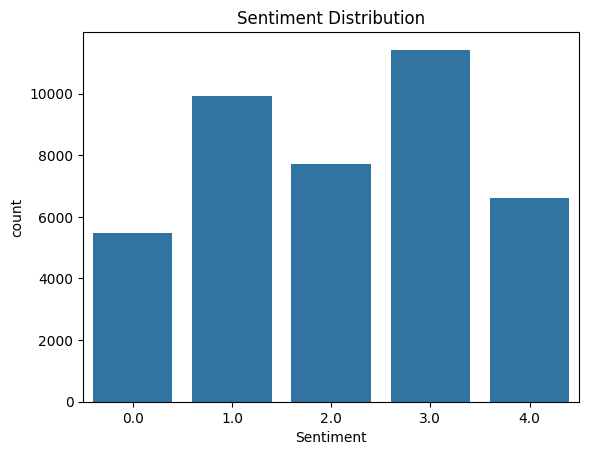

In [12]:
sns.countplot(x='Sentiment', data=corpus)
plt.title('Sentiment Distribution')
plt.show()

In [13]:
corpus['OriginalTweet'].sample(10).values

array(['@DorothyMonc Mine too! I dint find potatoes on last 3 trips but got rice onion n pricey tomatoes! This trip i got potatoes n bread. Im gonna look for frozen peas tmoro. #BeThoughtful #StopHoarding  #coronavirus',
       '#coronavirus #CoronaCrisis #stopstockpiling #StopPanicBuying #coronavirus #panicshopping #panicbuyinguk #coronavirus #Covid_19 #CoronaVirusUpdate #COVID19 #SocialDistanacing\r\r\n\r\r\nCan elderly isolation be managed by the state?',
       "Coronavirus-fueled panic buying cleared the shelves of eggs. What's next for egg markets? https://t.co/DmJrE0EfMI",
       "@realDonaldTrump\r\r\nYou have such a potty mouth, especially with GREAT reporters. You're insecure. And you're killing America. Now finding #toiletpaper has become a #coronavirus challenge. NO MORE! @Trevornoah\r\r\n@jimmykimmel @jimmyfallon @iamwandasykes \r\r\n",
       "I have just been to the supermarket and it was literally full of OAPs shuffling around. What's it going to take for these people t

### Cleaning words sentences using regular expression

In [14]:
def clean_tweet(tweet):
    tweet = re.sub(r'@\w+', '', tweet)
    tweet = re.sub(r'#', '', tweet)
    tweet = re.sub(r'http\S+', '', tweet)
    tweet = re.sub(r'[^A-Za-z\s]', '', tweet)
    tweet = re.sub(r'\d+', '', tweet)
    tweet = re.sub(r'\s+', ' ', tweet).strip()
    
    return tweet

corpus['OriginalTweet'] = corpus['OriginalTweet'].apply(clean_tweet)


C:\Users\tasnu\AppData\Local\Temp\ipykernel_3444\1898283594.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corpus['OriginalTweet'] = corpus['OriginalTweet'].apply(clean_tweet)


In [15]:
corpus['OriginalTweet'].sample(10).values

array(['Two elderly ladies giving each other a big hug in the crowded supermarket aisle today while complaining about the Covid restrictions Theyre not really getting it',
       'You re Invited COVID amp Consumer Protection Global Advertising in a Time of Crisis Webinar via Passle by',
       'Terrifying video shows how one cough can spread a cloud of coronavirus across supermarket that lingers for min Extremely small particles of this size dont sink on the floor but instead move along in the air currents or remain floating in same space',
       'Ive been using vacation time to stay out of work due to Covid and I feel guilty because plenty of my coworkers and friends dont have the option to stay out of work I work at a retail store as a salesperson and my store doesnt need to be open but they still havent closed',
       'Are you providing or will be providing consumer direct food delivery services during the COVID pandemic Be safe Get the info on what you need to know about food saf

### Removing Stopwords

In [16]:
corpus['OriginalTweet'] = corpus['OriginalTweet'].str.lower()

C:\Users\tasnu\AppData\Local\Temp\ipykernel_3444\892715711.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corpus['OriginalTweet'] = corpus['OriginalTweet'].str.lower()


In [17]:
nltk.download('stopwords')

def remove_stop_words(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    new_text = []

    for word in words:
        if word not in stop_words:
            new_text.append(word)
    
    return ' '.join(new_text)

corpus['OriginalTweet'] = corpus['OriginalTweet'].apply(remove_stop_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tasnu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\tasnu\AppData\Local\Temp\ipykernel_3444\2800391941.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corpus['OriginalTweet'] = corpus['OriginalTweet'].apply(remove_stop_words)


### WordCloud Visualization

In [18]:
def get_words(df, sentiment, n=10):
    sentiment_df = df[df['Sentiment'] == sentiment]

    all_words = []
    for tokens in sentiment_df['OriginalTweet']:
        for word in tokens.split():
            all_words.append(word)

    top_words = Counter(all_words).most_common(n)
    return dict(top_words)

positive_words = get_words(corpus, 3.0 , 10)
negative_words = get_words(corpus, 1.0, 10)
neutral_words = get_words(corpus, 2.0, 10)
extremely_positive_words = get_words(corpus, 4.0, 10)
extremely_negative_words = get_words(corpus, 0.0, 10)

print("Top 10 Extremely Positive Words:", extremely_positive_words)
print("Top 10 Positive Words:", positive_words)
print("Top 10 Neutral Words:", neutral_words)
print("Top 10 Negative Words:", negative_words)
print("Top 10 Extremely Negative Words:", extremely_negative_words)

Top 10 Extremely Positive Words: {'covid': 3450, 'coronavirus': 2661, 'store': 1260, 'amp': 1123, 'supermarket': 1084, 'grocery': 1072, 'food': 992, 'help': 977, 'hand': 939, 'prices': 936}
Top 10 Positive Words: {'covid': 6150, 'coronavirus': 4837, 'prices': 2025, 'store': 2023, 'grocery': 1930, 'supermarket': 1915, 'food': 1798, 'people': 1435, 'amp': 1421, 'consumer': 1300}
Top 10 Neutral Words: {'covid': 4181, 'coronavirus': 3805, 'supermarket': 1335, 'store': 1320, 'prices': 1229, 'grocery': 1182, 'consumer': 981, 'shopping': 756, 'online': 695, 'food': 675}
Top 10 Negative Words: {'covid': 5137, 'coronavirus': 4313, 'prices': 2370, 'food': 2021, 'supermarket': 1733, 'store': 1523, 'people': 1415, 'grocery': 1412, 'amp': 1078, 'consumer': 951}
Top 10 Extremely Negative Words: {'covid': 2874, 'coronavirus': 2404, 'food': 1567, 'prices': 1349, 'people': 1215, 'panic': 1141, 'supermarket': 932, 'crisis': 837, 'amp': 826, 'store': 663}


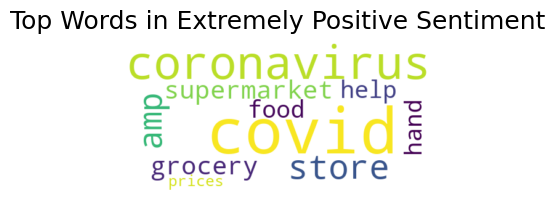

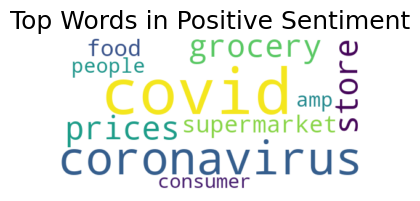

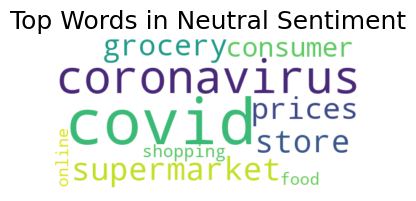

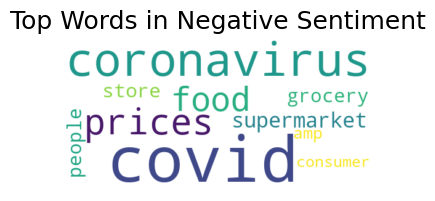

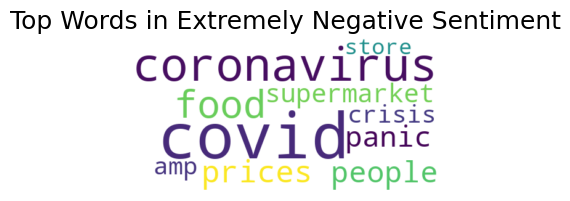

In [19]:
def plot_wordcloud(word_freq, title):
    wordcloud = WordCloud(width=500, height=250, background_color='white').generate_from_frequencies(word_freq)
    plt.figure(figsize=(4, 2))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=18)
    plt.show()

plot_wordcloud(extremely_positive_words, 'Top Words in Extremely Positive Sentiment')
plot_wordcloud(positive_words, 'Top Words in Positive Sentiment')
plot_wordcloud(neutral_words, 'Top Words in Neutral Sentiment')
plot_wordcloud(negative_words, 'Top Words in Negative Sentiment')
plot_wordcloud(extremely_negative_words, 'Top Words in Extremely Negative Sentiment')

### Data spiliting

In [20]:
x = corpus['OriginalTweet']
y = corpus['Sentiment']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=40)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=40)

In [21]:
x_train

35460    australia export prices chickpeas faba beans l...
8258     response covid virus urt made decision tempora...
27105    oil gas jobs risk hurt demand russia saudi ara...
420      thread chinas role wildlife trade come greater...
7434     think adorable kidsactivities dfwparents paren...
                               ...                        
34197    provides help irishconsumers bought fights euu...
14873    florida panic mode trucks delivering job calm ...
19160    looks like changing prices brita jugs amp filt...
4177     global oilprices plunge yearlow per barrel ami...
32395    heartbreaking devastating covidwalkout covid c...
Name: OriginalTweet, Length: 33336, dtype: object

### Tokenization

In [22]:
nltk.download('punkt_tab')
x_train = x_train.apply(word_tokenize)
x_test = x_test.apply(word_tokenize)
x_cal = x_val.apply(word_tokenize)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\tasnu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [23]:
x_train

35460    [australia, export, prices, chickpeas, faba, b...
8258     [response, covid, virus, urt, made, decision, ...
27105    [oil, gas, jobs, risk, hurt, demand, russia, s...
420      [thread, chinas, role, wildlife, trade, come, ...
7434     [think, adorable, kidsactivities, dfwparents, ...
                               ...                        
34197    [provides, help, irishconsumers, bought, fight...
14873    [florida, panic, mode, trucks, delivering, job...
19160    [looks, like, changing, prices, brita, jugs, a...
4177     [global, oilprices, plunge, yearlow, per, barr...
32395    [heartbreaking, devastating, covidwalkout, cov...
Name: OriginalTweet, Length: 33336, dtype: object

### Data visualization

Maximum length of each instances: 40


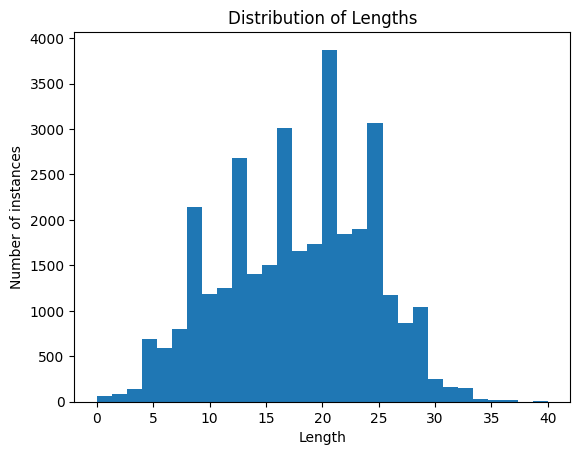

In [24]:
length = [len(token) for token in x_train]
print(f'Maximum length of each instances: {max(length)}')

plt.hist(length, bins=30)
plt.xlabel('Length')
plt.ylabel('Number of instances')
plt.title('Distribution of Lengths')
plt.show()

## Instruction to download GoogleNews word2vec pretrain weights

Kindly go through the following steps-

1. Download the [googlenews-vectors-negative300.bin.gz](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/view?resourcekey=0-wjGZdNAUop6WykTtMip30g)
2. Copy the file and paste it in the current working directory.


#### Word2Vec Pretrain Model

In [25]:
zip_path = 'GoogleNews-vectors-negative300.bin.gz'
word2vec_model = KeyedVectors.load_word2vec_format(zip_path, binary=True) 

#### Applying word2vec in sentence token [matrix_size = (token_number* 300)]

In [26]:
def vectorize_sentence(sentence, model):
    vectors = []
    for word in sentence:
        if word in model:
            vectors.append(model[word])
    return vectors

x_train = x_train.apply(lambda tokens: vectorize_sentence(tokens, word2vec_model))
x_test = x_test.apply(lambda tokens: vectorize_sentence(tokens, word2vec_model))
x_val= x_val.apply(lambda tokens: vectorize_sentence(tokens, word2vec_model))

In [27]:
# each vector size = len(x_train[index]) * 300

x_train[3]

[array([-0.18164062,  0.16503906, -0.16601562,  0.35742188, -0.09228516,
         0.20117188, -0.0546875 , -0.26171875, -0.17285156, -0.08056641,
         0.14648438, -0.24609375,  0.18652344,  0.10253906, -0.3203125 ,
         0.16699219, -0.0032196 , -0.06640625,  0.06591797, -0.109375  ,
         0.13964844, -0.05029297,  0.25390625,  0.0859375 ,  0.02026367,
         0.05517578, -0.08447266,  0.07324219,  0.15429688, -0.13867188,
        -0.25195312, -0.15136719,  0.07958984,  0.00848389, -0.24902344,
         0.05224609,  0.04394531, -0.19726562, -0.2109375 ,  0.01477051,
        -0.23632812, -0.14355469,  0.17773438,  0.26757812, -0.08789062,
        -0.07910156, -0.16113281,  0.23632812, -0.07177734,  0.08837891,
         0.07177734, -0.11962891, -0.09228516, -0.12060547, -0.00448608,
        -0.21875   , -0.05712891, -0.04418945,  0.07226562, -0.05883789,
        -0.12597656,  0.03125   , -0.24609375,  0.19140625,  0.14941406,
        -0.19335938, -0.1875    , -0.05126953,  0.0

In [28]:
def vector_lengths(data):
    vec_len = {}
    for vec in data:
        if len(vec) not in vec_len:
            vec_len[len(vec)] = 1
        else:
            vec_len[len(vec)] += 1

    return vec_len

In [29]:
print(f'Train: {vector_lengths(x_train)}')
print(f'Validation: {vector_lengths(x_val)}')
print(f'Test: {vector_lengths(x_test)}')

Train: {23: 1393, 12: 1499, 21: 1837, 24: 1180, 4: 531, 3: 293, 13: 1505, 7: 1075, 19: 1820, 18: 1757, 14: 1525, 27: 471, 9: 1393, 16: 1668, 15: 1567, 5: 715, 17: 1767, 10: 1437, 22: 1635, 6: 940, 20: 1875, 8: 1358, 11: 1461, 1: 49, 25: 946, 28: 292, 26: 708, 29: 210, 30: 108, 2: 138, 0: 41, 34: 13, 31: 56, 32: 47, 35: 6, 33: 15, 37: 1, 36: 4}
Validation: {127: 26, 136: 36, 143: 35, 115: 35, 149: 32, 67: 30, 50: 18, 139: 26, 59: 22, 77: 20, 165: 13, 134: 33, 157: 23, 142: 30, 114: 27, 110: 44, 119: 44, 69: 25, 147: 24, 51: 25, 54: 29, 97: 37, 137: 39, 2: 1, 62: 23, 64: 19, 124: 33, 117: 31, 19: 6, 102: 32, 88: 29, 148: 36, 76: 22, 128: 34, 48: 18, 140: 41, 56: 16, 130: 35, 156: 24, 73: 33, 92: 24, 100: 35, 98: 32, 135: 41, 93: 30, 103: 32, 111: 29, 133: 31, 33: 12, 96: 32, 65: 21, 132: 40, 38: 8, 91: 36, 81: 25, 164: 24, 79: 25, 150: 23, 106: 29, 99: 27, 95: 24, 70: 13, 105: 43, 129: 26, 74: 21, 35: 7, 125: 32, 153: 35, 113: 45, 55: 20, 94: 38, 120: 49, 123: 33, 20: 6, 43: 16, 86: 22, 

### Padding the sentences

In [30]:
train_max_len = max(vector_lengths(x_train))
val_max_len = max(vector_lengths(x_val))
test_max_len = max(vector_lengths(x_test))

def pad_sequence(sequence, max_len):
    if len(sequence) < max_len:
        padding = [np.zeros(300)] * (max_len - len(sequence))
        return sequence + padding
    
    return sequence

x_train = x_train.apply(lambda x: pad_sequence(x, train_max_len))
x_val = x_val.apply(lambda x: pad_sequence(x, val_max_len))
x_test = x_test.apply(lambda x: pad_sequence(x, test_max_len))

### Convert to Tensor

In [31]:
print(x_train.dtypes)
print(y_train.dtypes)

object
float64


In [32]:
print(f'Train: {vector_lengths(x_train)}')
print(f'Validation: {vector_lengths(x_val)}')
print(f'Test: {vector_lengths(x_test)}')

Train: {37: 33336}
Validation: {211: 3705}
Test: {36: 4116}


In [33]:
x_train_tensor = torch.tensor(x_train.tolist(), dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.tolist(), dtype=torch.long)
x_val_tensor = torch.tensor(x_val.tolist(), dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.tolist(), dtype=torch.long)
x_test_tensor = torch.tensor(x_test.tolist(), dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.tolist(), dtype=torch.long)

train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

val_dataset = TensorDataset(x_val_tensor, y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

test_dataset = TensorDataset(x_test_tensor, y_test_tensor)
test_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

C:\Users\tasnu\AppData\Local\Temp\ipykernel_3444\2376048147.py:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:281.)
  x_train_tensor = torch.tensor(x_train.tolist(), dtype=torch.float32)


In [34]:
print(x_train_tensor.size())
print(x_val_tensor.size())
print(x_test_tensor.size())

torch.Size([33336, 37, 300])
torch.Size([3705, 211, 300])
torch.Size([4116, 36, 300])


In [35]:
print(y_train_tensor.unique())
print(y_val_tensor.unique())
print(y_test_tensor.unique())

tensor([4, 0, 2,  ..., 1, 3, 4])
tensor([0, 1, 2, 3, 4])
tensor([0, 1, 2, 3, 4])


### LSTM Model

In [36]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout = 0.4)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out

In [37]:
def calculate_accuracy(y_pred, y_true):
    y_pred_tag = torch.argmax(y_pred, dim=1)
    correct_results_sum = (y_pred_tag == y_true).sum().float()
    acc = correct_results_sum / y_true.shape[0]
    acc = torch.round(acc * 100)
    return acc

In [38]:
input_size = 300
hidden_size = 128
output_size = 5
num_layers = 1

model = LSTMModel(input_size, hidden_size, output_size, num_layers)
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

C:\Users\tasnu\AppData\Roaming\Python\Python312\site-packages\torch\nn\modules\rnn.py:88: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.4 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


In [39]:
train_losses = []
val_losses = []

train_accuracy = []
val_accuracy = []

num_epochs = 15

# Training and Validation

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    train_acc = 0
    
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_x)
        loss = loss_function(outputs, batch_y)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        train_acc += calculate_accuracy(outputs, batch_y)
    
    model.eval()
    val_loss = 0
    val_acc = 0
    
    with torch.no_grad():
        for batch_x, batch_y in val_loader:
            val_outputs = model(batch_x)
            val_loss += loss_function(val_outputs, batch_y).item()
            val_acc += calculate_accuracy(val_outputs, batch_y)

    train_loss /= len(train_loader)
    train_acc /= len(train_loader)
    val_loss /= len(val_loader)
    val_acc /= len(val_loader)

    train_losses.append(train_loss)
    train_accuracy.append(train_acc)

    val_losses.append(val_loss)
    val_accuracy.append(val_acc)
    
    print(f'Epoch {epoch+1}/{num_epochs}')
    print(f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f}%')
    print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.2f}%')

Epoch 1/15
Train Loss: 1.4729, Train Accuracy: 32.73%
Validation Loss: 2.6646, Validation Accuracy: 17.63%
Epoch 2/15
Train Loss: 1.3587, Train Accuracy: 38.38%
Validation Loss: 3.1647, Validation Accuracy: 18.02%
Epoch 3/15
Train Loss: 1.3066, Train Accuracy: 42.14%
Validation Loss: 3.0794, Validation Accuracy: 17.63%
Epoch 4/15
Train Loss: 1.1814, Train Accuracy: 50.07%
Validation Loss: 3.1142, Validation Accuracy: 16.91%
Epoch 5/15
Train Loss: 1.0962, Train Accuracy: 54.46%
Validation Loss: 2.6343, Validation Accuracy: 25.70%


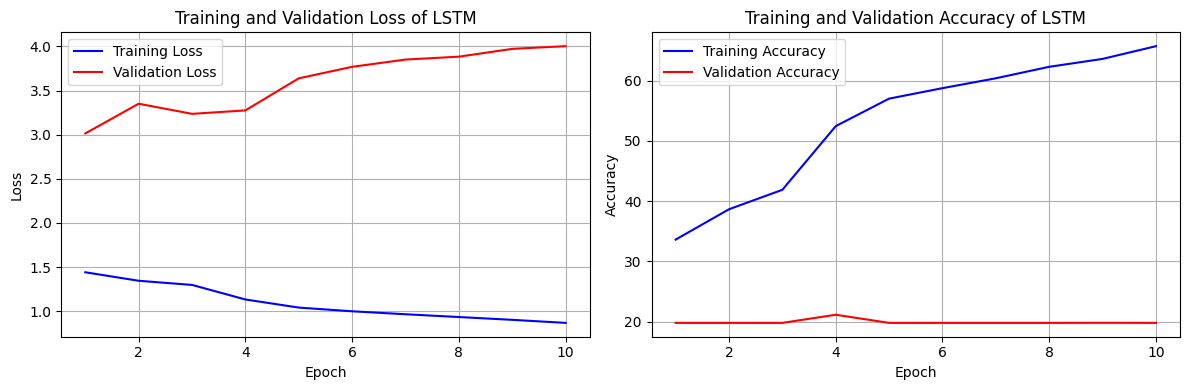

In [42]:
plt.figure(figsize=(12, 4)) 

plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss', color='blue')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss of LSTM')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracy, label='Training Accuracy', color='blue')
plt.plot(range(1, num_epochs + 1), val_accuracy, label='Validation Accuracy', color='red')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy of LSTM')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Testing

model.eval()
lstm_test_loss = 0
lstm_test_accuracy = 0

with torch.no_grad():
    for batch_x, batch_y in test_loader:
        test_outputs = model(batch_x)
        lstm_test_loss += loss_function(test_outputs, batch_y).item()
        lstm_test_accuracy += calculate_accuracy(test_outputs, batch_y)

lstm_test_loss /= len(test_loader)
lstm_test_accuracy /= len(test_loader)

print(f'Test Loss: {lstm_test_loss:.4f}, Test Accuracy: {lstm_test_accuracy:.2f}%')

In [ ]:
lstm_train_accuracy = max(train_accuracy)
lstm_val_accuracy = max(val_accuracy)

### GRU Model

In [43]:
class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super(GRUModel, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True, dropout=0.5)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.gru(x)
        out = self.fc(out[:, -1, :])
        return out

In [44]:
input_size = 300
hidden_size = 128
output_size = 5
num_layers = 1

model = GRUModel(input_size, hidden_size, output_size, num_layers)
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

C:\Users\tasnu\AppData\Roaming\Python\Python312\site-packages\torch\nn\modules\rnn.py:88: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


In [45]:
train_losses = []
val_losses = []

train_accuracy = []
val_accuracy = []

num_epochs = 15

# Training and Validation

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    train_acc = 0
    
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_x)
        loss = loss_function(outputs, batch_y)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        train_acc += calculate_accuracy(outputs, batch_y)
    
    model.eval()
    val_loss = 0
    val_acc = 0
    
    with torch.no_grad():
        for batch_x, batch_y in val_loader:
            val_outputs = model(batch_x)
            val_loss += loss_function(val_outputs, batch_y).item()
            val_acc += calculate_accuracy(val_outputs, batch_y)

    train_loss /= len(train_loader)
    train_acc /= len(train_loader)
    val_loss /= len(val_loader)
    val_acc /= len(val_loader)

    train_losses.append(train_loss)
    train_accuracy.append(train_acc)

    val_losses.append(val_loss)
    val_accuracy.append(val_acc)
    
    print(f'Epoch {epoch+1}/{num_epochs}')
    print(f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f}%')
    print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.2f}%')

Epoch 1/10
Train Loss: 1.5647, Train Accuracy: 28.16%
Validation Loss: 2.0242, Validation Accuracy: 21.16%
Test Loss: 2.0242, Test Accuracy: 21.16%
Epoch 2/10
Train Loss: 1.3465, Train Accuracy: 40.54%
Validation Loss: 2.3579, Validation Accuracy: 25.77%
Test Loss: 2.3579, Test Accuracy: 25.77%
Epoch 3/10
Train Loss: 1.0875, Train Accuracy: 54.77%
Validation Loss: 2.9822, Validation Accuracy: 25.88%
Test Loss: 2.9822, Test Accuracy: 25.88%
Epoch 4/10
Train Loss: 0.9991, Train Accuracy: 58.57%
Validation Loss: 3.2211, Validation Accuracy: 24.24%
Test Loss: 3.2211, Test Accuracy: 24.24%
Epoch 5/10
Train Loss: 0.9555, Train Accuracy: 60.76%
Validation Loss: 3.3872, Validation Accuracy: 23.12%
Test Loss: 3.3872, Test Accuracy: 23.12%
Epoch 6/10
Train Loss: 0.9256, Train Accuracy: 62.72%
Validation Loss: 3.4859, Validation Accuracy: 21.73%
Test Loss: 3.4859, Test Accuracy: 21.73%
Epoch 7/10
Train Loss: 0.8995, Train Accuracy: 63.97%
Validation Loss: 3.3118, Validation Accuracy: 24.22%
Test 

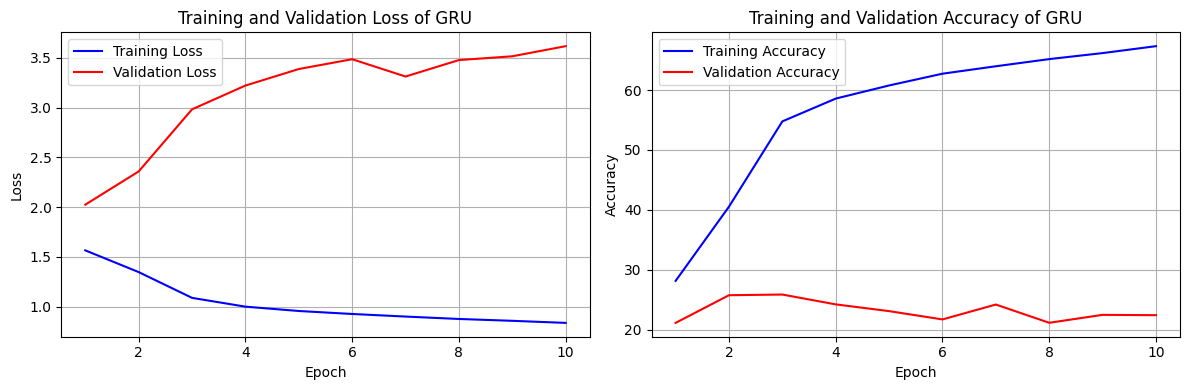

In [47]:
plt.figure(figsize=(12, 4)) 

plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss', color='blue')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss of GRU')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracy, label='Training Accuracy', color='blue')
plt.plot(range(1, num_epochs + 1), val_accuracy, label='Validation Accuracy', color='red')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy of GRU')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Testing

model.eval()
gru_test_loss = 0
gru_test_accuracy = 0

with torch.no_grad():
    for batch_x, batch_y in test_loader:
        test_outputs = model(batch_x)
        gru_test_loss += loss_function(test_outputs, batch_y).item()
        gru_test_accuracy += calculate_accuracy(test_outputs, batch_y)

gru_test_loss /= len(test_loader)
gru_test_accuracy /= len(test_loader)

print(f'Test Loss: {gru_test_loss:.4f}, Test Accuracy: {gru_test_accuracy:.2f}%')

In [ ]:
gru_train_accuracy = max(train_accuracy)
gru_val_accuracy = max(val_accuracy)

### Comapre the models

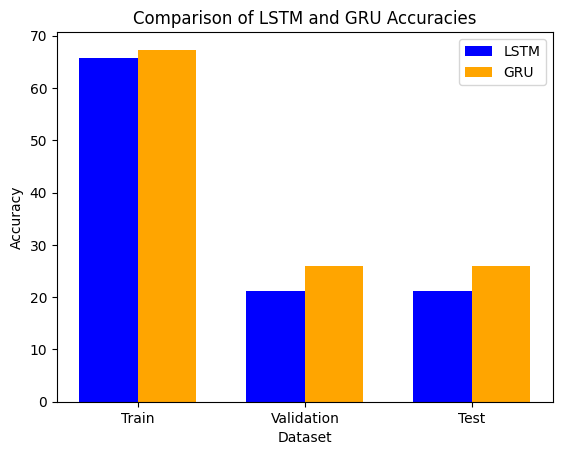

In [48]:
labels = ['Train', 'Validation', 'Test']
lstm_accuracies = [lstm_train_accuracy, lstm_val_accuracy, lstm_test_accuracy]
gru_accuracies = [gru_train_accuracy, gru_val_accuracy, gru_test_accuracy]

bar_width = 0.35
index = range(len(labels))

plt.bar(index, lstm_accuracies, bar_width, label='LSTM', color='blue')
plt.bar([i + bar_width for i in index], gru_accuracies, bar_width, label='GRU', color='orange')

plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Comparison of LSTM and GRU Accuracies')
plt.xticks([i + bar_width / 2 for i in index], labels)

plt.legend()
plt.show()